In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import sys, os

%matplotlib inline

In [2]:
def read_data(rootdir):
    data_list = {}
    for subdir, dirs, files in os.walk(rootdir):
        for fname in files:
            #print os.path.join(subdir, file)
            filepath = subdir + fname
            df = pd.read_csv(filepath, sep='\t')
            
            data_key = fname.split('.')[0]
            data_list[data_key] = {}
            if fname.find("CRF") != -1:
                data_list[data_key] = {
                    'acc': df.iloc[:,4].tolist(),
                    'loss': df.iloc[:,1].tolist(),
                    'val_acc': df.iloc[:,3].tolist(),
                    'val_loss': df.iloc[:,2].tolist()
                }
            else:
                
                data_list[data_key] = {
                    'acc': df.iloc[:,1].tolist(),
                    'loss': df.iloc[:,2].tolist(),
                    'val_acc': df.iloc[:,3].tolist(),
                    'val_loss': df.iloc[:,4].tolist()
                }
    return data_list

In [3]:
data = read_data("../../data/results/performance/")
print data

{'MLP_GO': {'acc': [0.9497981200074708, 0.973448047456843, 0.9783452148204662, 0.9805138477218104, 0.9822802977880524, 0.9833843290794536, 0.9844016150475812, 0.9845751056790872, 0.9854346728988208, 0.9857816541693531, 0.9859314869799514, 0.9862784682429632, 0.9867989401299604, 0.9870986057737184, 0.9874219292158224], 'loss': [0.33445454630221666, 0.1396543678444091, 0.10669998394475903, 0.0916578591962273, 0.08266446772807931, 0.07735108386514375, 0.07211734874476118, 0.06927891027408664, 0.0673372414384704, 0.06546301759074866, 0.0637624941765792, 0.06250559190445297, 0.06019173969080646, 0.058859356035598324, 0.058762022015620974], 'val_acc': [0.9668832822411826, 0.9687796303633804, 0.9713697649071746, 0.9725029487613832, 0.9732661132802464, 0.9731042296316712, 0.9731504823521884, 0.9707916100559842, 0.9723410650425082, 0.9698203097400764, 0.9718322889709068, 0.9717397842425202, 0.9721791819659809, 0.9704678432605816, 0.9690802710294112], 'val_loss': [0.24917071339769295, 0.22375435

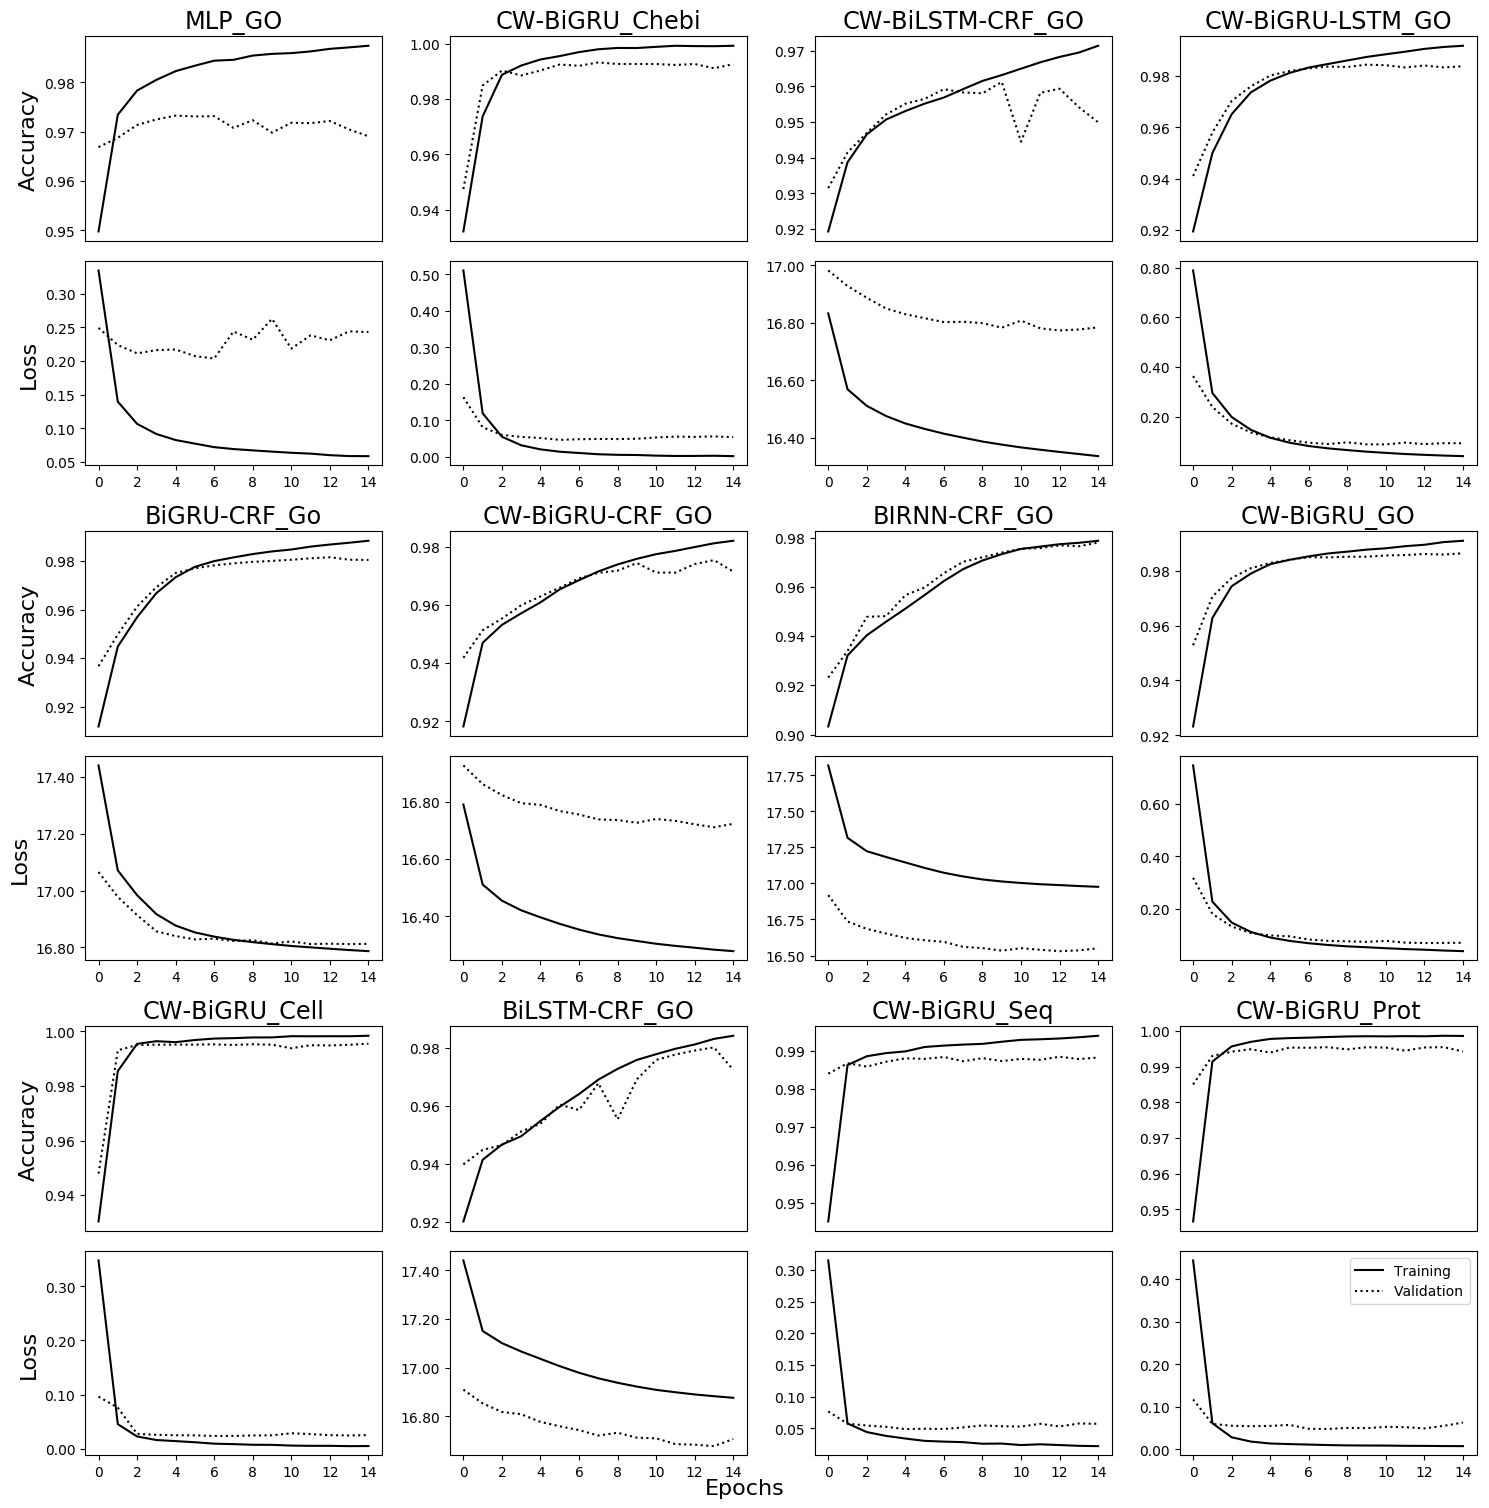

In [26]:
params = {'axes.titlesize':'xx-large'}
plt.rcParams.update(params)
n_rows = 3
n_colums = 4

n_plots = 24

fig = plt.figure(figsize=(15, 15), dpi=100)

outer = gridspec.GridSpec(n_rows, n_colums)

count = 0
x = list(range(0, 15))
for key,value in data.iteritems():
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[count], wspace=0.5, hspace=0.1)
    try:
        for j in range(2):
            ax = plt.Subplot(fig, inner[j])

            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #         t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
            if j==0:
                ax.plot(x, value["acc"], label='Training Accuracy', linestyle='-', color='black')
                ax.plot(x, value["val_acc"], label='Validation Accuracy', linestyle=':', color='black')
                ax.get_xaxis().set_visible(False)
                if count % 4 == 0:
                    ax.set_ylabel('Accuracy' , fontsize=16)
                ax.title.set_text(key)
            else:
                ax.plot(x, value["loss"], label='Training Loss', linestyle='-', color='black')
                ax.plot(x, value["val_loss"], label='Validation Loss', linestyle=':', color='black')
                ax.xaxis.set_major_locator(MaxNLocator(integer=True))
                if count % 4 == 0:
                    ax.set_ylabel('Loss' , fontsize=16)
                if count == 11:
                    handles, labels = ax.get_legend_handles_labels()
                    ax.legend(handles, ['Training', 'Validation'], loc="upper right")
            fig.add_subplot(ax)
        count += 1
    except Exception as e:
        print e
        print len(value["acc"]), len(value["val_acc"]), key
    

fig.text(0.5, 0.0001, 'Epochs', ha='center' , fontsize=16)
fig.tight_layout() 

plt.savefig('../../data/results/performance/loss_accuracy.eps',dpi=1200)